In [4]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [5]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# To understand the data, we will view its dimensions
''' From running this code, we can see that we have 60,000
    images of 28x28 pixels and 60,000 labels '''
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


Label: 5


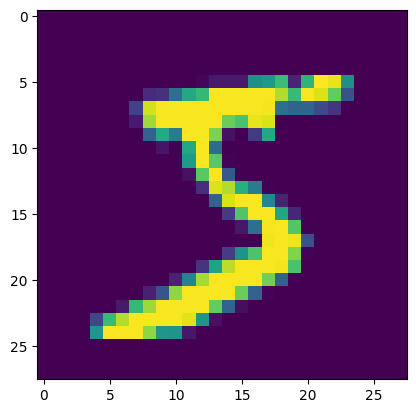

In [7]:
# Lets also visualize our data as an image
image = x_train[0]
label = y_train[0]
print(f"Label: {label}")
plt.imshow(image)

In [10]:
# to fit our models expectations we will have to engineer the data
# lets make our data type a float
x_train = (x_train.astype('float32') / (255))[..., None]
x_test = (x_test.astype('float32') / (255))[..., None]

In [12]:
# lets define our model
# feel free to change the layers/function parameters for different results
model = tf.keras.Sequential([
    # define input shape
    tf.keras.layers.Input(shape=(28,28,1)),
    # convolutional layers to detect edges
    # max pooling to select the most significant activations
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # convert to 1d tensor for dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # softmax gives probabilities for each digit
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.4119 - loss: 1.6773
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.8742 - loss: 0.4106
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.9168 - loss: 0.2687
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9394 - loss: 0.1977
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9505 - loss: 0.1631
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9582 - loss: 0.1433
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9626 - loss: 0.1222
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.9662 - loss: 0.1098
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 113ms/step - accuracy: 0.9696 - loss: 0.1003
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 106ms/step - accuracy: 0.9703 - loss: 0.0987


In [15]:
''' our nn outputs a probability for each digit (0 - 9)
    we can make an output tensor containing the prediction
    by using the argmax function
'''
y_pred = model.predict(x_test)
print("output shape from nn: ")
print(y_pred.shape)
y_pred= y_pred.argmax(axis=1)
print("updated output: ")
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
output shape from nn: 
(10000, 10)
updated output: 
(10000,)


In [16]:
#now it matches the shape of our labels
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


In [17]:
#this allows use to check out accuracy with sckikit-learn
print(accuracy_score(y_test, y_pred))

0.9794


In [18]:
#we can also use tensorflows evaluate function
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Keras test_acc:", test_acc)



Keras test_acc: 0.9793999791145325
